In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')

In [4]:
df.sample(5)

,Unnamed: 0,label,text,label_num
1572,1853,ham,Subject: fyi\r\njust wanted to let you know th...,0
1779,3245,ham,"Subject: re : wellhead adjustments - may , 200...",0
3285,2392,ham,Subject: your amazon . com order ( # 104 - 967...,0
1774,4849,spam,"Subject: usb charset = us - ascii "" >\r\nexter...",1
1346,1042,ham,Subject: nom change on tejas for garza plant\r...,0


In [5]:
df.shape

(5171, 4)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0','label_num'],inplace=True)

In [9]:
df.sample(5)

,label,text
1903,ham,Subject: hpl fuel gas buy - back for december ...
2392,spam,Subject: be done all with credit card debt\r\n...
3702,ham,Subject: fw : n . padre 883 gas allocation\r\n...
4581,spam,"Subject: fw : dripping wmeon plcs\r\nhello , h..."
3953,spam,Subject: italian crafted rolex from $ 75 to $ ...


In [10]:
df.columns

Index(['label', 'text'], dtype='object')

In [11]:
df['text']

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [12]:
# renaming the cols
df.rename(columns={'label':'target','text':'text'},inplace=True)
df.sample(5)

,target,text
3812,spam,Subject: buy popular drugs online\r\nonline ph...
2835,ham,Subject: pg & e texas 6 / 00\r\ni received an ...
4607,ham,Subject: calpine daily gas nomination\r\n> jul...
546,spam,Subject: re : 1 / 2 price sildenafil citrate t...
3215,ham,"Subject: re : tenaska iv\r\nok , since we don ..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

178

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(4993, 2)

## 2.EDA

In [21]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [22]:
df['target'].value_counts()

target
0    3531
1    1462
Name: count, dtype: int64

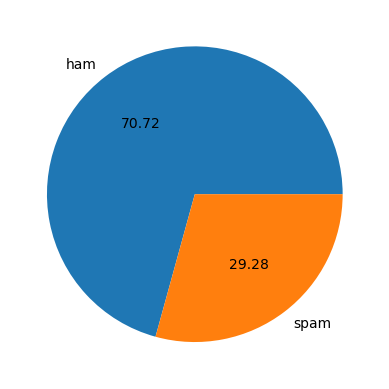

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
!pip install nltk

Unable to create process using 'C:\Users\Harsh sharma\anaconda3\python.exe "C:\Users\Harsh sharma\anaconda3\Scripts\pip-script.py" install nltk'


In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Harsh
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [30]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [35]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [36]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

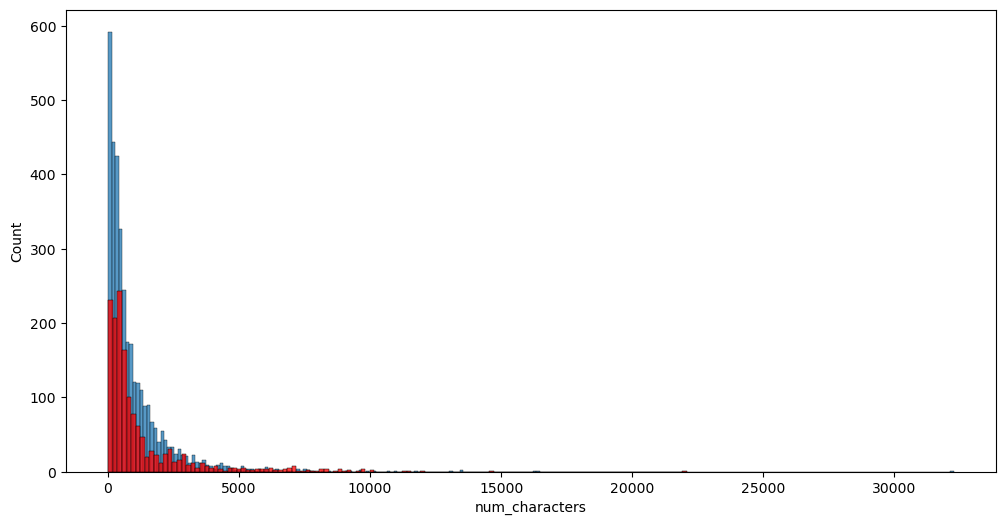

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

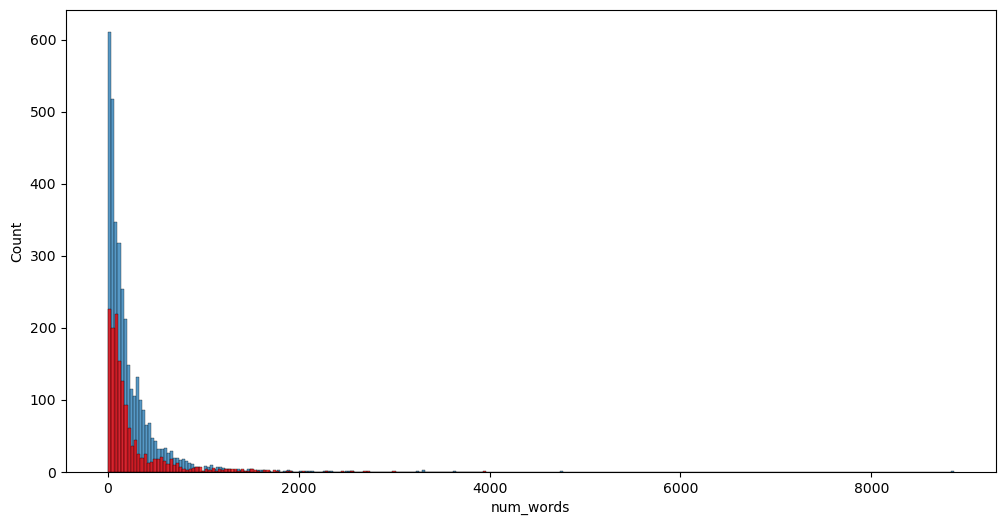

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\Harsh sharma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


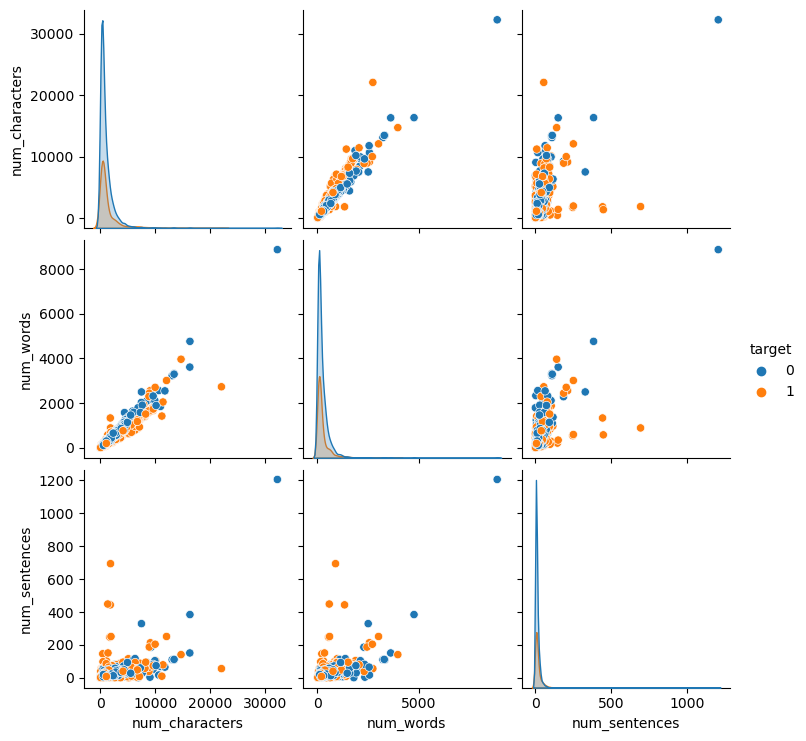

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

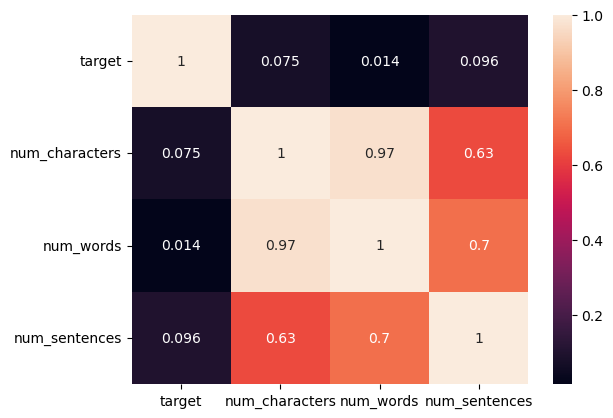

In [41]:
import seaborn as sns
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Harsh
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('playing')

'play'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [46]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [54]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [48]:
df['transformed_text'] =  df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [52]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.1 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

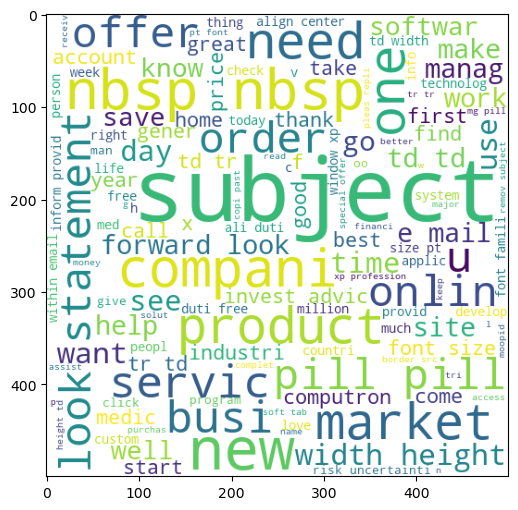

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

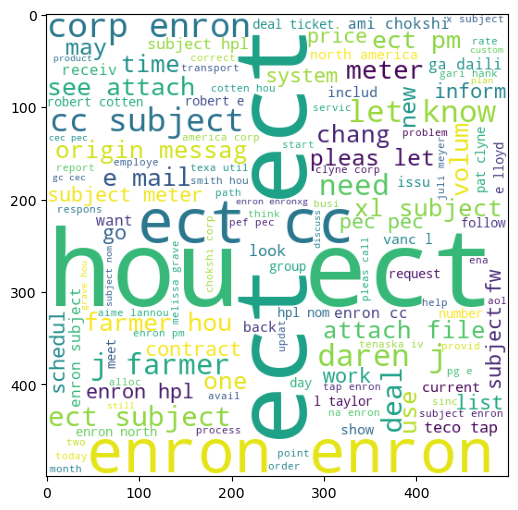

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [61]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [62]:
len(spam_corpus)

196592

In [78]:
import seaborn as sns

In [79]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(100)),Counter(spam_corpus).most_common(100))

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [84]:
from collections import Counter
sns.barplot( pd.DataFrame(Counter(spam_corpus).most_common(100))[0])

ValueError: could not convert string to float: 'subject'

In [65]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

ValueError: could not convert string to float: 'subject'

In [85]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [86]:
len(ham_corpus)

380475

In [87]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [88]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


## 4. Model Building

In [101]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [102]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [103]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [104]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [105]:
X.shape

(4993, 3000)

In [106]:
y = df['target'].values

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [110]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9579579579579579
[[678  19]
 [ 23 279]]
0.9362416107382551


In [112]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9319319319319319
[[648  49]
 [ 19 283]]
0.8524096385542169


In [114]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9039039039039038
[[645  52]
 [ 44 258]]
0.832258064516129


In [115]:
# tfidf --> MNB

In [118]:
pip install xgboost 


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.1/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.1/99.8 MB 787.7 kB/s eta 0:02:07
   ---------------------------------------- 0.3/99.8 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.4/99.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.5/99.8 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.6/99.8 MB 1.7 MB/s eta 0:00:59
   ---------------------------------------- 0.7/99.8 MB 1.8 MB/s eta 0:00:54
   -----------------------------

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [120]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [121]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [122]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [123]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.980980980980981, 0.9639344262295082)

In [124]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.980980980980981
Precision -  0.9639344262295082
For  KN
Accuracy -  0.953953953953954
Precision -  0.9295302013422819
For  NB
Accuracy -  0.9319319319319319
Precision -  0.8524096385542169
For  DT
Accuracy -  0.8448448448448449
Precision -  0.6681922196796338
For  LR
Accuracy -  0.955955955955956
Precision -  0.9056603773584906
For  RF
Accuracy -  0.965965965965966
Precision -  0.935064935064935
For  AdaBoost
Accuracy -  0.948948948948949
Precision -  0.8934169278996865
For  BgC
Accuracy -  0.9419419419419419
Precision -  0.8836477987421384
For  ETC
Accuracy -  0.978978978978979
Precision -  0.9576547231270358
For  GBDT
Accuracy -  0.9359359359359359
Precision -  0.9219858156028369
For  xgb
Accuracy -  0.958958958958959
Precision -  0.9116719242902208


In [125]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [129]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.980981,0.963934
8,ETC,0.978979,0.957655
5,RF,0.965966,0.935065
1,KN,0.953954,0.929530
9,GBDT,0.935936,0.921986
10,xgb,0.958959,0.911672
4,LR,0.955956,0.905660
6,AdaBoost,0.948949,0.893417
7,BgC,0.941942,0.883648
2,NB,0.931932,0.852410


In [130]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [131]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.980981
1,ETC,Accuracy,0.978979
2,RF,Accuracy,0.965966
3,KN,Accuracy,0.953954
4,GBDT,Accuracy,0.935936
5,xgb,Accuracy,0.958959
6,LR,Accuracy,0.955956
7,AdaBoost,Accuracy,0.948949
8,BgC,Accuracy,0.941942
9,NB,Accuracy,0.931932


C:\Users\Harsh sharma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


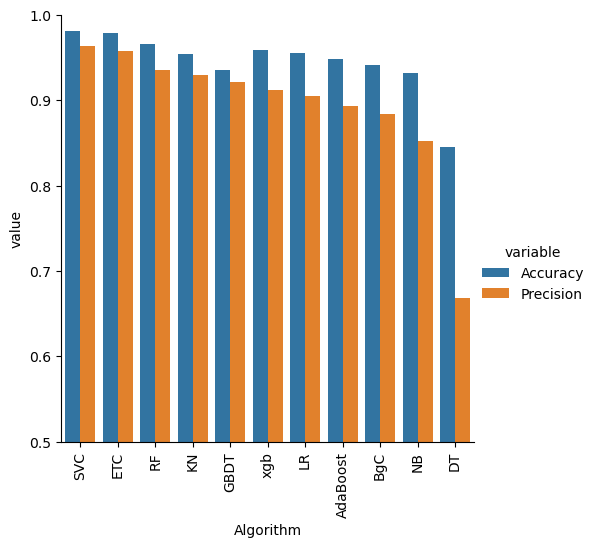

In [132]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [133]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [134]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [135]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [136]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [137]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [138]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [139]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.980981,0.963934,0.980981,0.963934,0.980981,0.963934,0.980981,0.963934
1,ETC,0.978979,0.957655,0.978979,0.957655,0.978979,0.957655,0.978979,0.957655
2,RF,0.965966,0.935065,0.965966,0.935065,0.965966,0.935065,0.965966,0.935065
3,KN,0.953954,0.929530,0.953954,0.929530,0.953954,0.929530,0.953954,0.929530
4,GBDT,0.935936,0.921986,0.935936,0.921986,0.935936,0.921986,0.935936,0.921986
5,xgb,0.958959,0.911672,0.958959,0.911672,0.958959,0.911672,0.958959,0.911672
6,LR,0.955956,0.905660,0.955956,0.905660,0.955956,0.905660,0.955956,0.905660
7,AdaBoost,0.948949,0.893417,0.948949,0.893417,0.948949,0.893417,0.948949,0.893417
8,BgC,0.941942,0.883648,0.941942,0.883648,0.941942,0.883648,0.941942,0.883648
9,NB,0.931932,0.852410,0.931932,0.852410,0.931932,0.852410,0.931932,0.852410


In [140]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [141]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [143]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [144]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.983983983983984
Precision 0.9703947368421053


In [145]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [146]:
from sklearn.ensemble import StackingClassifier

In [147]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [148]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.980980980980981
Precision 0.9732441471571907


In [149]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))